### Introduction to Machine Learning
-----------------------------


#### Preface
-------
- What is Machine Learning?


> “A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.”

This is how [Tom Mitchelle] defines Machine Learning. It is essentially art and science of designing adaptive algorithms. In other words, Designing algorithms that ingest data and learn a (hypothesized) model of the data. This model can then be used to detect patterns, predict future data points, help in decision making, etc.


- When to use Machine Learning?


When there is no closed form solution, has too many ways to solve problem, a need for automation. That means sometimes it is infeasible for humans to write a normal computer program or cannot specify a rigid rule to solve the problem. 

For example, finding spelling mistake is not a Machine Learning problem, however, suggesting correct spelling can be a good ML problem

[Tom Mitchelle]: #

#### Features
---------------

Finally, when we give problems to computer, it should be nice set of numbers. So be it any problem, we need to convert it into set of numbers so that computer can process. In ML we call it features. Most ML Algorithms use numerical vectors to represent features. Lets look at an example of this.



- Problem statement: To identify incoming email as spam or not

Let's understand the problem first. To identify a new email as spam or not system should know how a normal mail and a spam mail look like. Now is a good time to understand *Training Data* and *Test Data*. Email that we already have can be used to teach computer how normal email and spam email look like. These are our Training Data. Any new incoming email would be Test Data. Job of ML trained computer is to predict this new email as spam or not.

Example[^1]: Consider following three email headings: -

- Good Email: Do you want to go for dinner?
- Spam Email: Do you want to win a million dollars?
- Good Email: I have a million things to do today!

For computers to start its job, we need to convert these emails to numbers. More precisely a __feature vector__. One way to do it is called __bag of words__. We encode the emails as shown below: -

| Email    |   Do|You|Want|Go|Million|Dollars|Dinner|Today|
|----------|-----|---|----|--|-------|-------|------|-----|
| Email1 |   1 |1  |1   |1 |0      |0      |1     |0    |
| Email2 |   1 |1  |1   |0 |1      |1      |0     |0    |
| Email3 |   1 |0  |0   |0 |1      |0      |0     |1    |


Programmatically, the things would approximately look like as given below. (Certainly not the best way, but this is for demonstration purpose only): -


In [1]:
email1 = "Do you want to go for dinner?"
email2 = "Do you want to win a million dollars?"
email3 = "I have a million things to do today!"

In [2]:
import re

In [3]:
# Creating bag of words for the given three emails
bagOfWords = []
for email in [email1, email2, email3]:
    for string in set(email.split(' ')):
        if string not in bagOfWords:
            bagOfWords.append(re.sub(r'[\W_]', '', string))

In [4]:
# So this is our bag of words.
print(bagOfWords)

['you', 'want', 'Do', 'dinner', 'to', 'for', 'go', 'million', 'dollars', 'win', 'a', 'things', 'do', 'I', 'have', 'today']


In [14]:
# But we need to clean up the stop words from this list, since it does not give much information about nature of mail.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/rahul/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
for string in bagOfWords:
    if string.lower() in set(stopwords.words('english')):
        bagOfWords.remove(string)

In [25]:
print(bagOfWords)

['want', 'dinner', 'go', 'million', 'dollars', 'win', 'things', 'today']


In [46]:
# Now we will convert each email to a vector as follows: -
v = [0] * len(bagOfWords) # initialize vector v
for string in bagOfWords:
    if string in [re.sub(r'[\W_]','', s) for s in email1.split(' ')]:
        v[bagOfWords.index(string)] = 1
e1 = v # Saving vector to variable e1 for email1

In [47]:
e1

[1, 1, 1, 0, 0, 0, 0, 0]

In [48]:
v = [0] * len(bagOfWords)
for string in bagOfWords:
    if string in [re.sub(r'[\W_]','', s) for s in email2.split(' ')]:
        v[bagOfWords.index(string)] = 1
e2 = v

In [49]:
e2

[1, 0, 0, 1, 1, 1, 0, 0]

In [51]:
v = [0] * len(bagOfWords)
for string in bagOfWords:
    if string in [re.sub(r'[\W_]','', s) for s in email3.split(' ')]:
        v[bagOfWords.index(string)] = 1
e3 = v

In [52]:
e3

[0, 0, 0, 1, 0, 0, 1, 1]

As you can see the emails have been encoded as vectors now. Final result will be as follows
email1 = "Do you want to go for dinner?"
email2 = "Do you want to win a million dollars?"
email3 = "I have a million things to do today!"

| email | plain_text | vectorized_format |
|-------|:------------:|-------------------|
|email1 |   "Do you want to go for dinner?"         |[1, 1, 1, 0, 0, 0, 0, 0]|
|email2 | "Do you want to win a million dollars?" | [1, 0, 0, 1, 1, 1, 0, 0] |
|email3 | "I have a million things to do today!" |[0, 0, 0, 1, 0, 0, 1, 1]|

This is easier said than done. We have the vectors. But as you can notice, they are 1 X 8 dimensions. In other words you can say each email has 8 features and each of them is a dimension of that datapoint(email in this case). Visualizing beyond three dimension is a skill and is not possessed by all. So let us see a technique to reduce the dimension to 2 or 3 from any higher dimension so that visualization fairly represent the same as that in the higher dimension. This will help us appreciate better.

In [66]:
# Here we use method called t-distributed Stochastic Neighbor Embedding or simply t-SNE
import numpy as np
from sklearn.manifold import TSNE
X = np.array([e1, e2, e3])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded

array([[-869.4694 ,  834.6181 ],
       [-406.4485 ,  931.1655 ],
       [-554.34845,  481.90427]], dtype=float32)

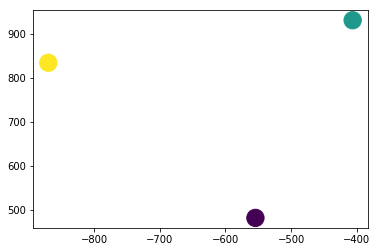

In [83]:
from matplotlib import pyplot as plt
colors = np.random.rand(3)
area = 300
plt.scatter(X_embedded.T[0],X_embedded.T[1],s=area, c=colors)
plt.show()

Above picture represent the emails that we have discussed earlier. These are data points which will be inputs for computers for training. Obvisouly we have converted the 8 dimensional vector on to a 2D to visualize. However, computers will see as is in the 8 dimensions. In upcoming series we will see that we will be handling dimensions go as high as hundreds or thousands and computers will have no problems handling in such higher dimension. But due to [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), we often tend to come down to lower dimensions. We will discuss this in future posts.

#### Author
 - Name: Rahul Raj
 - Website: [rahulrajpl.github.io](http://rahulrajpl.github.io)
 - Published date: 03 Aug, 19

#### License
----------------
~~~
Permission is granted to copy, distribute and/or modify this
document under the terms of the GNU Free Documentation License,
Version 1.3 or any later version published by the Free Software
Foundation; with no Invariant Sections, no Front-Cover Texts, and
no Back-Cover Texts.  A copy of the license is included in the
section entitled "GNU Free Documentation License".
~~~